In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [25]:
a_df = pd.read_csv('alzheimers_disease_data.csv')
a_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [26]:
a_df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#checking for null values
a_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [28]:
#dropping the columns
df =a_df.drop(['DoctorInCharge', 'PatientID'], axis=1, inplace=True)

In [29]:
a_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [30]:
a_df.all()

Age                           True
Gender                       False
Ethnicity                    False
EducationLevel               False
BMI                           True
Smoking                      False
AlcoholConsumption            True
PhysicalActivity              True
DietQuality                   True
SleepQuality                  True
FamilyHistoryAlzheimers      False
CardiovascularDisease        False
Diabetes                     False
Depression                   False
HeadInjury                   False
Hypertension                 False
SystolicBP                    True
DiastolicBP                   True
CholesterolTotal              True
CholesterolLDL                True
CholesterolHDL                True
CholesterolTriglycerides      True
MMSE                          True
FunctionalAssessment          True
MemoryComplaints             False
BehavioralProblems           False
ADL                           True
Confusion                    False
Disorientation      

Demographic Details

Age: The age of the patients ranges from 60 to 90 years.

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other

EducationLevel: The education level of the patients, coded as follows:

0: None

1: High School

2: Bachelor's

3: Higher

<Axes: xlabel='Diagnosis', ylabel='count'>

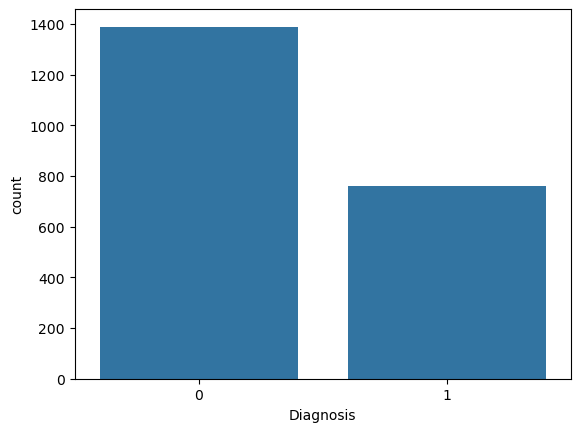

In [41]:
#0 indicates No and 1 indicates Yes
sns.countplot(x="Diagnosis", data=a_df)

In [31]:
demographicdf = a_df[['Age','Gender','Ethnicity','EducationLevel']]
demographicdf

,Age,Gender,Ethnicity,EducationLevel
0,73,0,0,2
1,89,0,0,0
2,73,0,3,1
3,74,1,0,1
4,89,0,0,0
...,...,...,...,...
2144,61,0,0,1
2145,75,0,0,2
2146,77,0,0,1
2147,78,1,3,1


<Axes: >

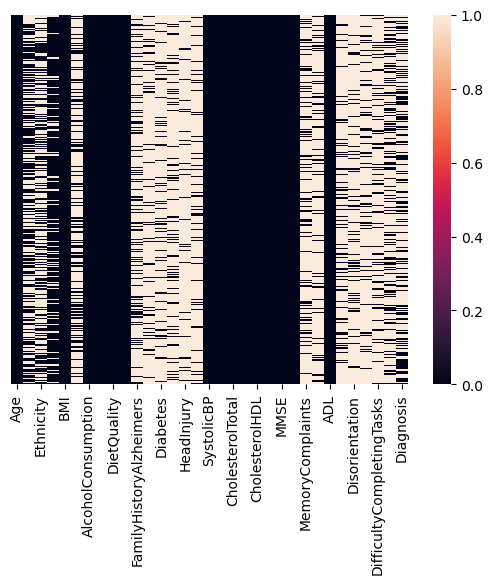

In [32]:
sns.heatmap(a_df == 0, yticklabels=False)

In [33]:
lifestyledf = a_df[['AlcoholConsumption','BMI','Smoking','PhysicalActivity', 'DietQuality', 'SleepQuality' ]]
lifestyledf

,AlcoholConsumption,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality
0,13.297218,22.927749,0,6.327112,1.347214,9.025679
1,4.542524,26.827681,0,7.619885,0.518767,7.151293
2,19.555085,17.795882,0,7.844988,1.826335,9.673574
3,12.209266,33.800817,1,8.428001,7.435604,8.392554
4,18.454356,20.716974,0,6.310461,0.795498,5.597238
...,...,...,...,...,...,...
2144,1.561126,39.121757,0,4.049964,6.555306,7.535540
2145,18.767261,17.857903,0,1.360667,2.904662,8.555256
2146,4.594670,15.476479,0,9.886002,8.120025,5.769464
2147,8.674505,15.299911,0,6.354282,1.263427,8.322874


Lifestyle Factors

BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

Medical History

FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.

Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.

Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.

HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.

Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

In [34]:
medicaldf = a_df[['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression','HeadInjury','Hypertension']]

medicaldf

,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension
0,0,0,1,1,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
2144,0,0,0,0,0,0
2145,0,0,0,0,0,0
2146,0,0,0,0,0,0
2147,0,1,0,0,0,0


Symptoms

Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.

Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.

PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.

DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.

Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

Diagnosis Information
Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

In [35]:
symptomsdf = a_df[['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness']]

symptomsdf

,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,1,0
3,0,0,0,0,0
4,0,0,1,1,0
...,...,...,...,...,...
2144,1,0,0,0,0
2145,0,0,0,0,0
2146,0,0,0,0,0
2147,0,0,0,0,1


<Axes: >

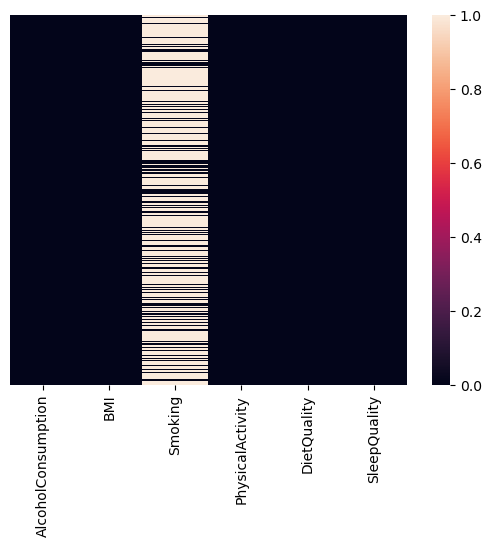

In [36]:
sns.heatmap(lifestyledf == 0, yticklabels=False)

Clinical Measurements

SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.

DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.

CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.

CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.

CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.

CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

In [37]:
clinicaldf = a_df[['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides']]

clinicaldf

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
0,142,72,242.366840,56.150897,33.682563,162.189143
1,115,64,231.162595,193.407996,79.028477,294.630909
2,99,116,284.181858,153.322762,69.772292,83.638324
3,118,115,159.582240,65.366637,68.457491,277.577358
4,94,117,237.602184,92.869700,56.874305,291.198780
...,...,...,...,...,...,...
2144,122,101,280.476824,94.870490,60.943092,234.520123
2145,152,106,186.384436,95.410700,93.649735,367.986877
2146,115,118,237.024558,156.267294,99.678209,294.802338
2147,103,96,242.197192,52.482961,81.281111,145.253746


<Axes: >

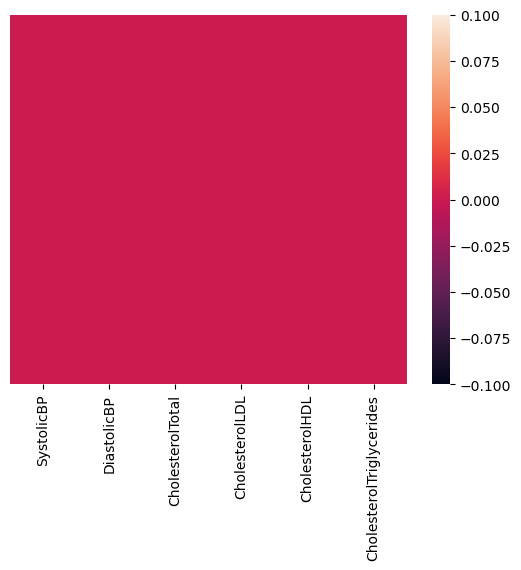

In [38]:
sns.heatmap(clinicaldf == 0, yticklabels=False)

Cognitive and Functional Assessments

MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.

ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

In [39]:
cognitivedf = a_df[['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL']]

cognitivedf

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
0,21.463532,6.518877,0,0,1.725883
1,20.613267,7.118696,0,0,2.592424
2,7.356249,5.895077,0,0,7.119548
3,13.991127,8.965106,0,1,6.481226
4,13.517609,6.045039,0,0,0.014691
...,...,...,...,...,...
2144,1.201190,0.238667,0,0,4.492838
2145,6.458060,8.687480,0,1,9.204952
2146,17.011003,1.972137,0,0,5.036334
2147,4.030491,5.173891,0,0,3.785399


<Axes: >

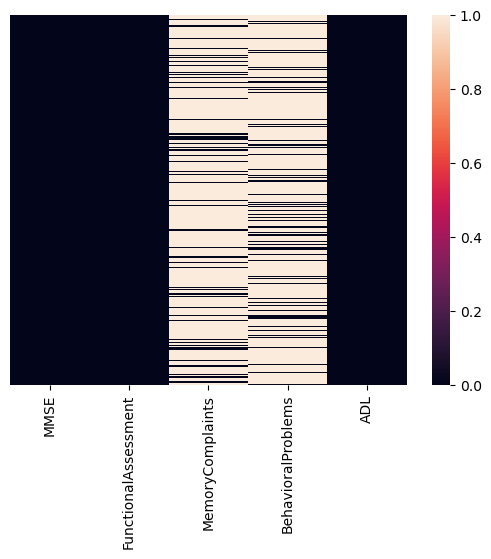

In [40]:
sns.heatmap(cognitivedf == 0, yticklabels=False)

In [42]:
#defining X nad y
X = a_df.drop('Diagnosis', axis = 1)
y = a_df['Diagnosis']


Correlation in Cognitive Features:
MemoryComplaints        0.306742
BehavioralProblems      0.224350
MMSE                   -0.237126
ADL                    -0.332346
FunctionalAssessment   -0.364898
Name: Diagnosis, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_4060\739675737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")


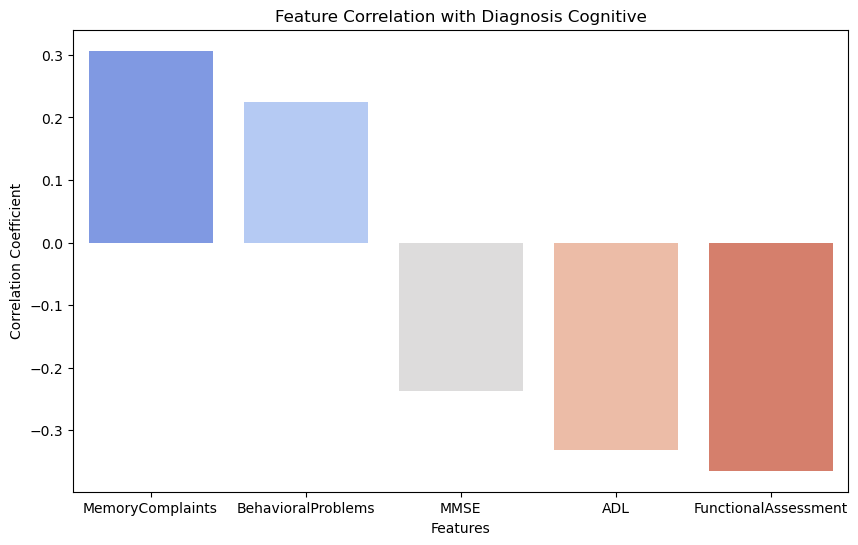


Correlation in Symptoms Features:
DifficultyCompletingTasks    0.009069
Forgetfulness               -0.000354
Confusion                   -0.019186
PersonalityChanges          -0.020627
Disorientation              -0.024648
Name: Diagnosis, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_4060\739675737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")


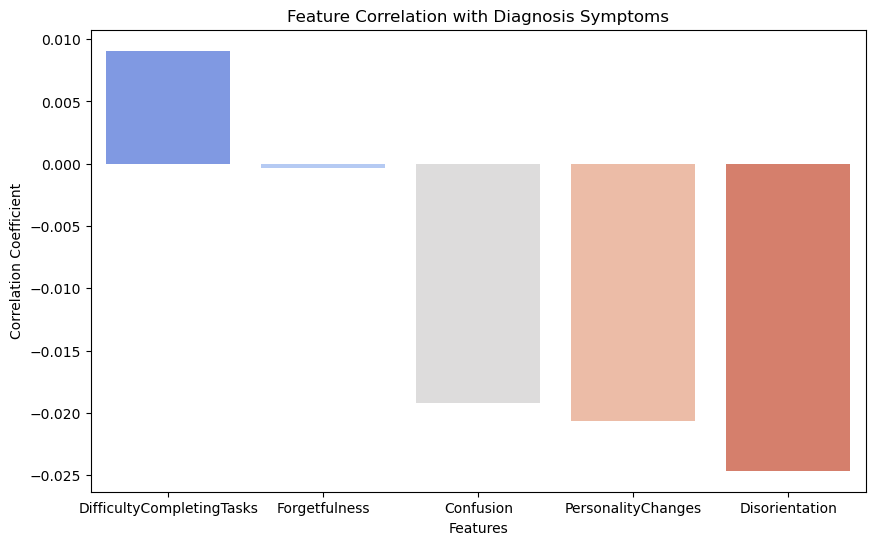

C:\Users\sarah\AppData\Local\Temp\ipykernel_4060\739675737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")



Correlation in Lifestyle Features:
BMI                   0.026343
DietQuality           0.008506
PhysicalActivity      0.005945
Smoking              -0.004865
AlcoholConsumption   -0.007618
SleepQuality         -0.056548
Name: Diagnosis, dtype: float64


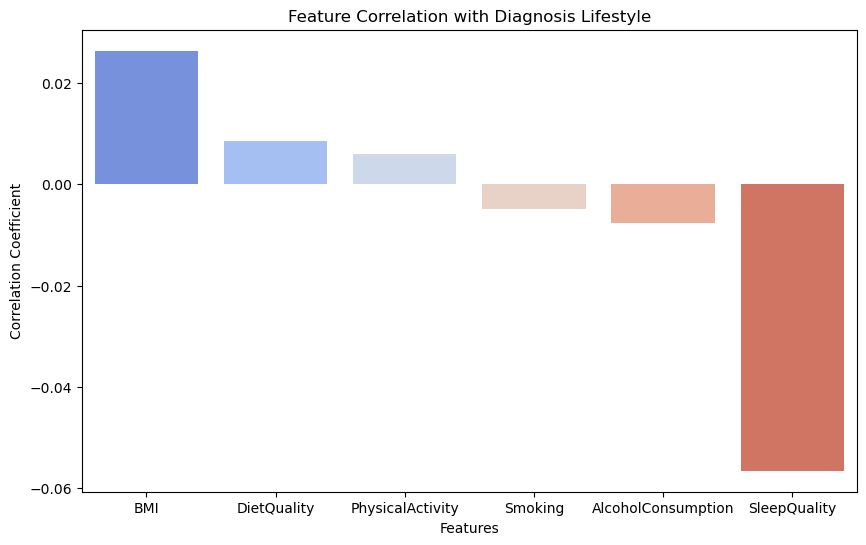


Correlation in Clinical Features:
CholesterolHDL              0.042584
CholesterolTriglycerides    0.022672
CholesterolTotal            0.006394
DiastolicBP                 0.005293
SystolicBP                 -0.015615
CholesterolLDL             -0.031976
Name: Diagnosis, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_4060\739675737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")


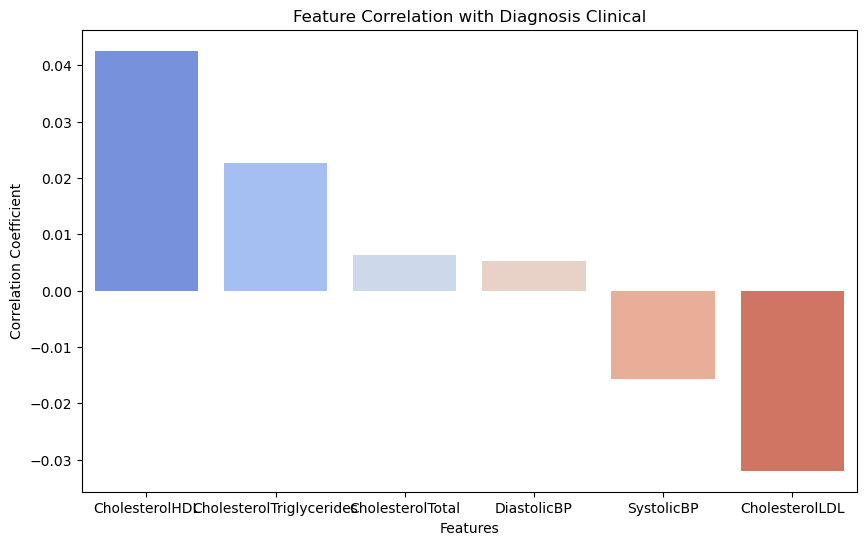


Correlation in Medical Features:
Hypertension               0.035080
CardiovascularDisease      0.031490
Depression                -0.005893
HeadInjury                -0.021411
Diabetes                  -0.031508
FamilyHistoryAlzheimers   -0.032900
Name: Diagnosis, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_4060\739675737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")


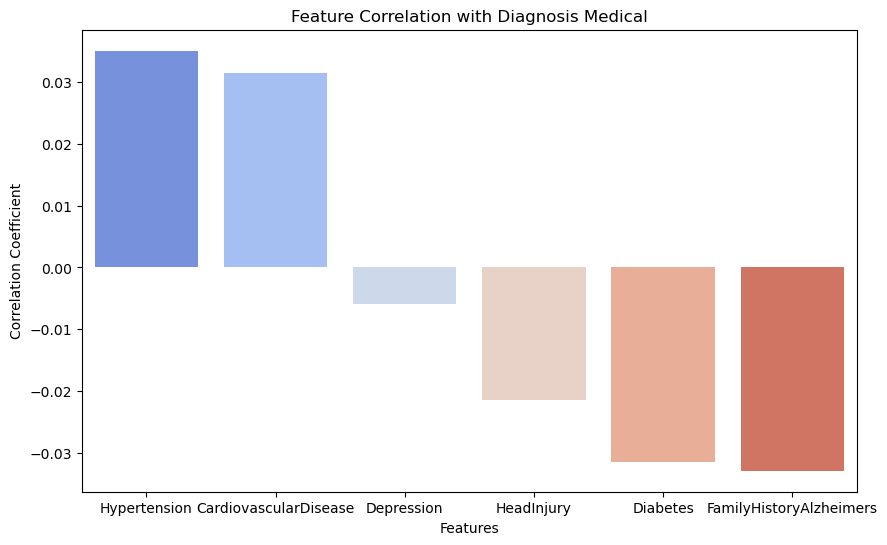


Correlation in Demographic Features:
Age              -0.005488
Ethnicity        -0.014782
Gender           -0.020975
EducationLevel   -0.043966
Name: Diagnosis, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_4060\739675737.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")


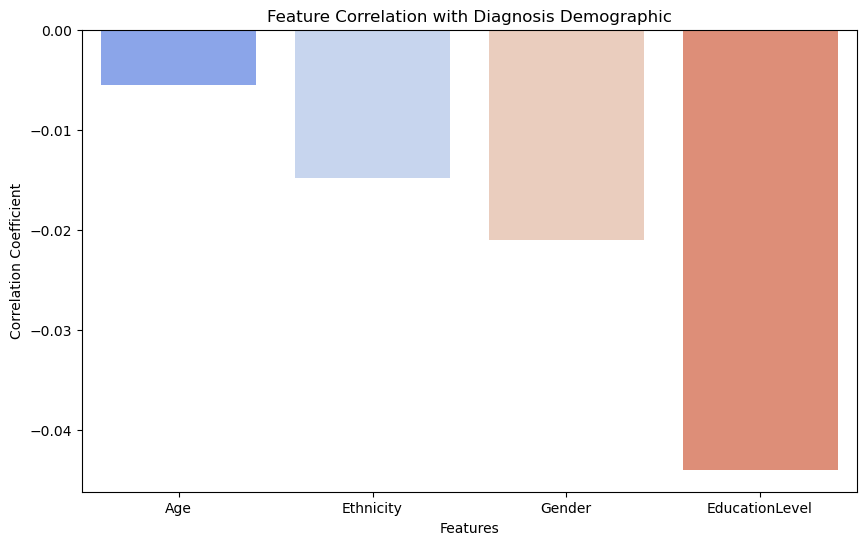

In [43]:
groups = {"Cognitive": cognitivedf,"Symptoms": symptomsdf,"Lifestyle": lifestyledf,"Clinical": clinicaldf,"Medical": medicaldf,"Demographic": demographicdf}

for name, group in groups.items():
    # Merge features with target variable
    dfy = pd.concat([group, y], axis=1)

    # Compute correlation matrix
    correlation_matrix = dfy.corr()

    # Extract correlation with target variable (Diagnosis)
    correlationy = correlation_matrix['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)

    # Display correlation values
    print(f"\nCorrelation in {name} Features:")
    print(correlationy)

    # Visualize correlation with y
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlationy.index, y=correlationy.values, palette="coolwarm")
    plt.title(f"Feature Correlation with Diagnosis {name}")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Features")
    plt.show()


Cross validation, gridsearch or randomizedgridsearch, KFold and array to store results and visualise the results

                                Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347        0.007528   
Diabetes    

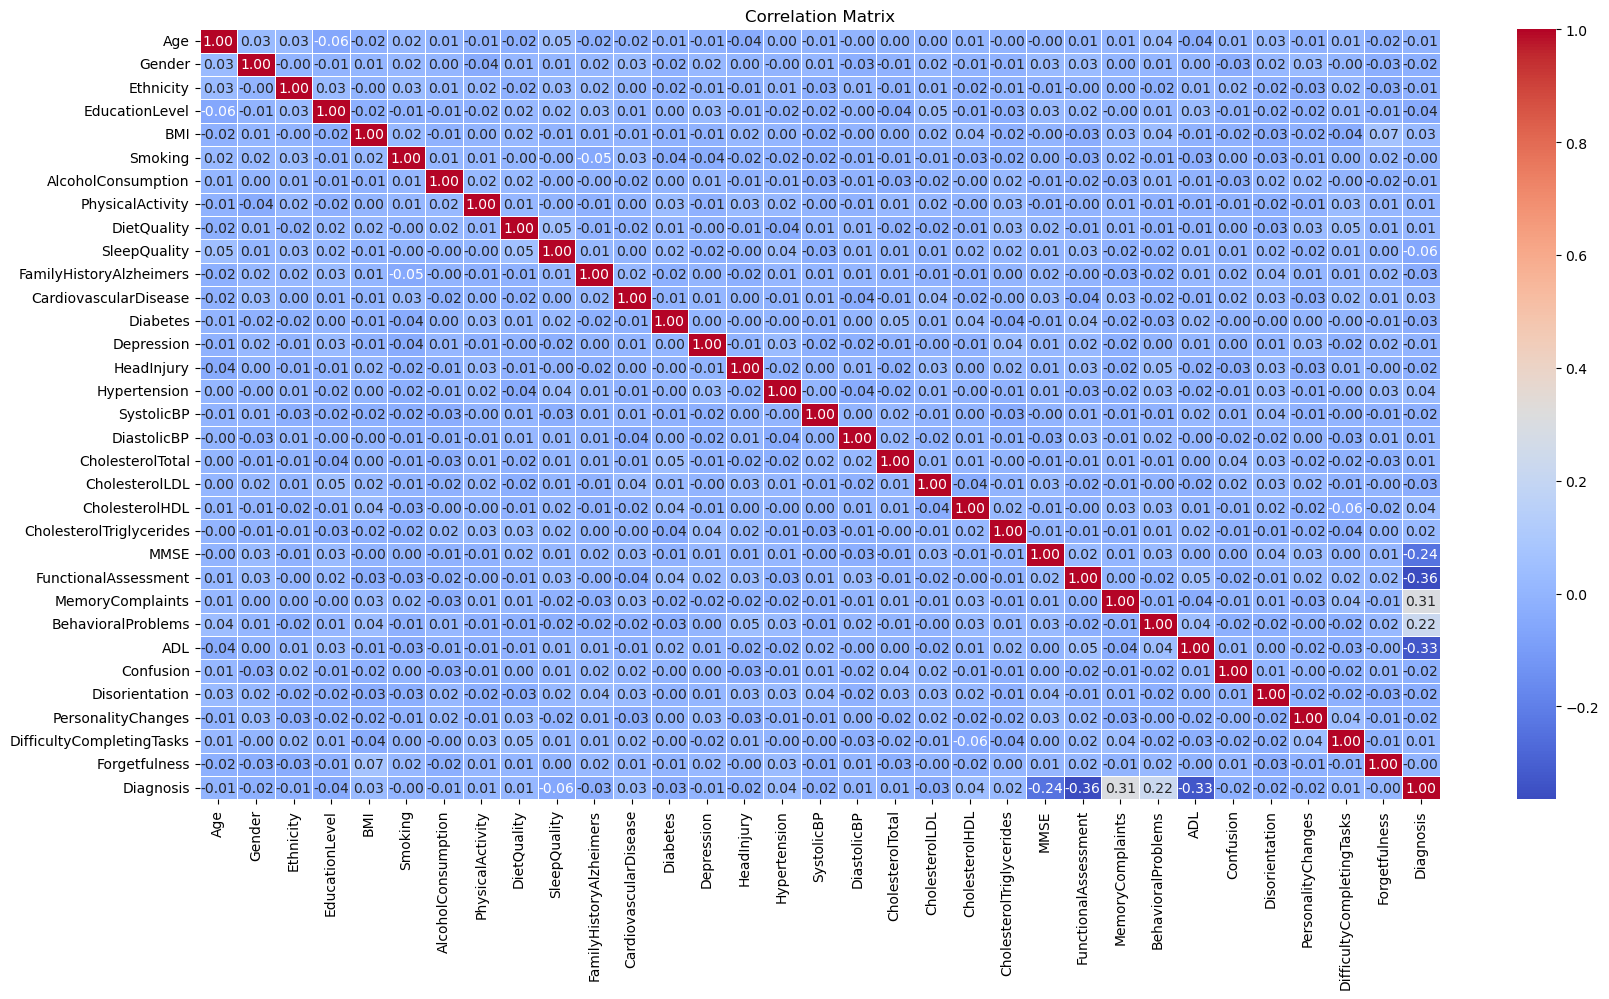

In [44]:
correlation_matrix = a_df.corr()
print(correlation_matrix)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [47]:
numerical = []
categorical = []
for col in a_df.columns:
    if a_df[col].nunique() > 4:
        numerical.append(col)
    else:
        categorical.append(col)

print(f'Numerical Variables: {len(numerical)}')
print(f'Categorical Variables: {len(categorical)}')

Numerical Variables: 15
Categorical Variables: 18


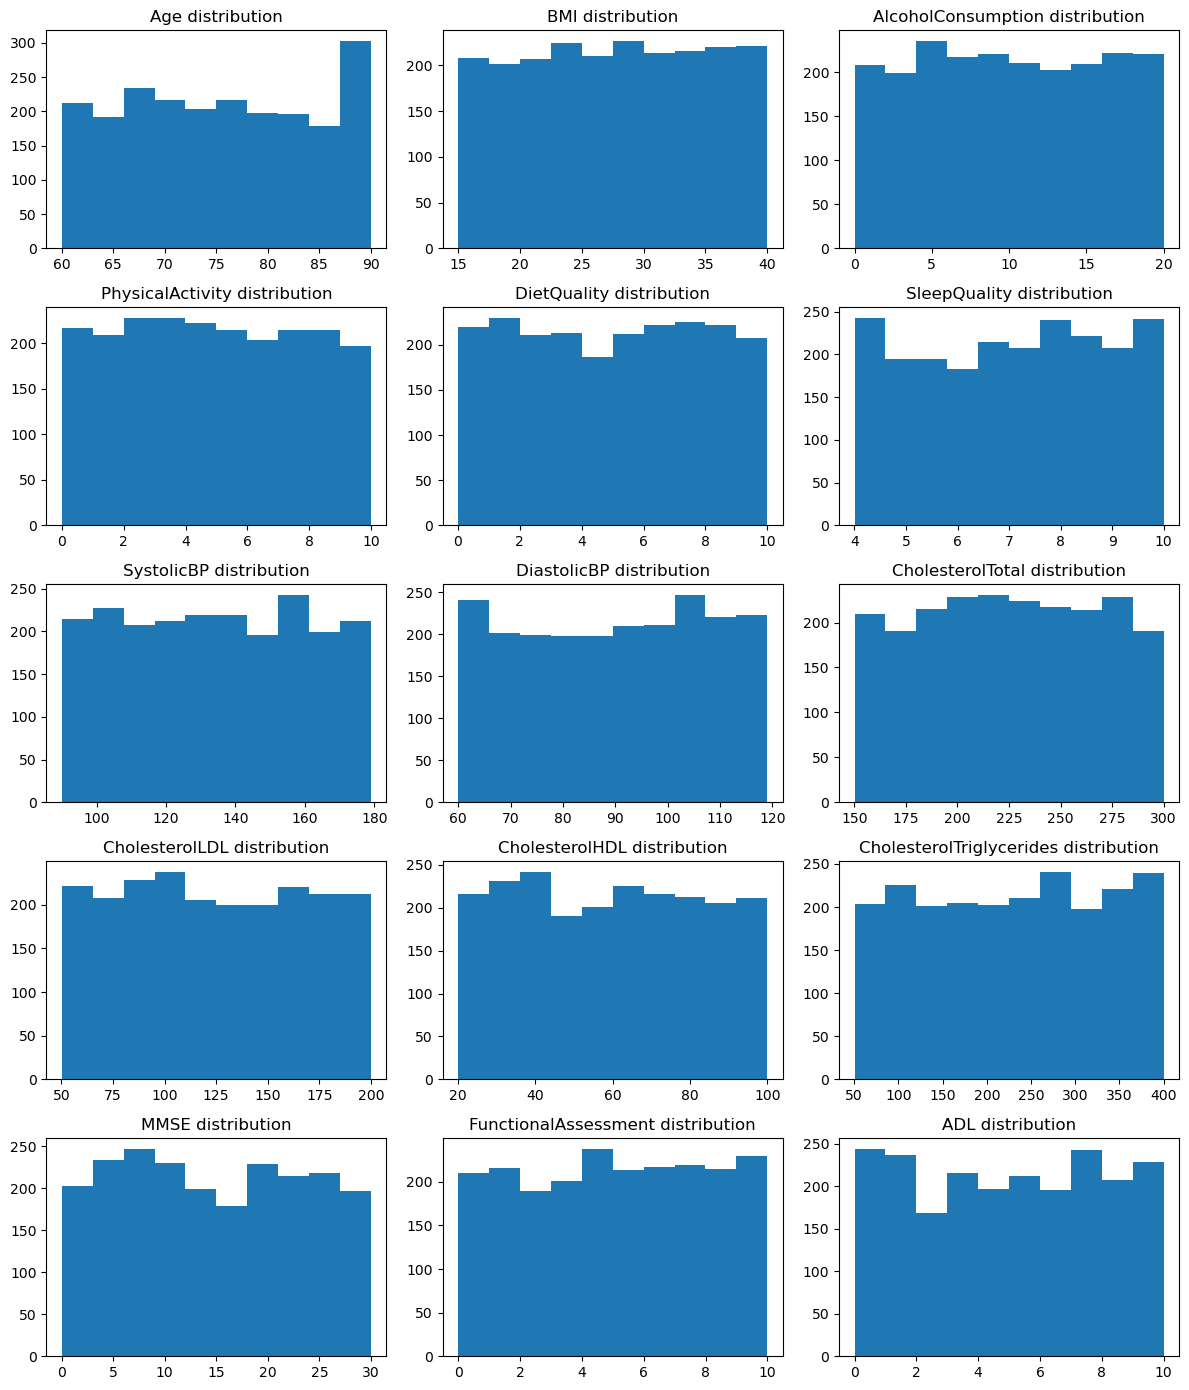

In [53]:
plt.figure(figsize=(12,14))
for i, col in enumerate(numerical, 1):
    plt.subplot(5,3,i)
    plt.hist(a_df[col])
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.savefig("numerical.png", dpi=300)
plt.show()

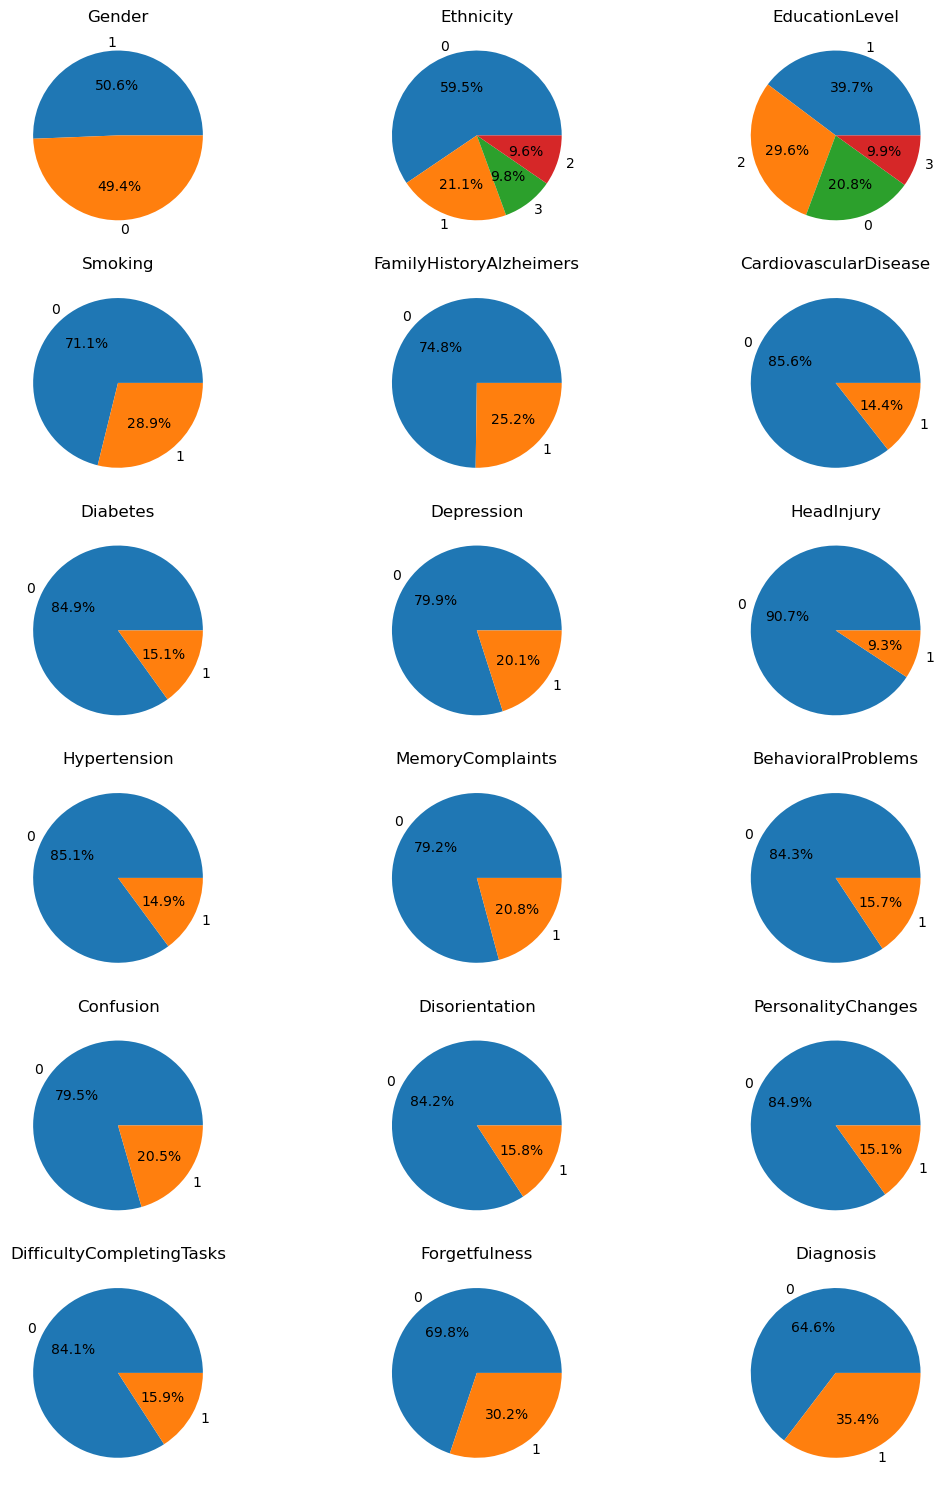

In [54]:
plt.figure(figsize=(12,15))
for i, col in enumerate(categorical, 1):
    plt.subplot(6,3,i)
    a_df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.ylabel('')  
    plt.title(f'{col}')

plt.tight_layout()
plt.savefig("categorical.png", dpi=300)
plt.show()